# Import Modules

In [8]:
import sys
sys.path.append('../')

import Levels_rework2 as Levels
import Results
from RMatrix import PTBayes
import Resonances
from SpinGroups import SpinGroups

In [9]:
%matplotlib widget

# Basic Fitting Example (WigBayes)

### Setting Mean Parameter Data

In [10]:
A  = 181
EB = (1e-5,2550)
pM    = [0.12547, 0.14404]
FreqF = 1/15
Freq  = [1/8.9868, 1/8.3065]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

### Sample Resonance Ladder

In [11]:
Res, Types, Missed_Res, Missed_Types = MP.sample()

In [12]:
Prior, TPPrior = PTBayes(Res, MP)
# runMaster = Levels.RunMaster(Res.E, MP.EB, Prior, TPPrior, MP.FreqAll)
distributions = MP.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP.EB, Prior, TPPrior, distributions, MP.FreqF)
Posterior, log_total_probability = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Results:

PT-only score =  41.90%
Wigner+PT score =  43.87%

Confusion Matrix:
     A    B   F
A   80   62  26
B  186  206  96
F   31   25  47



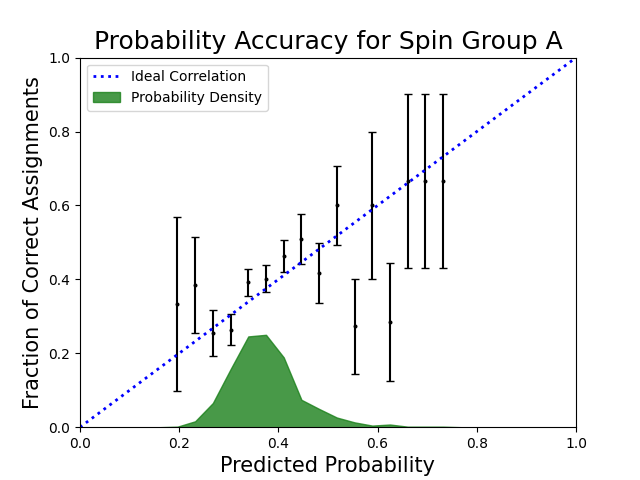

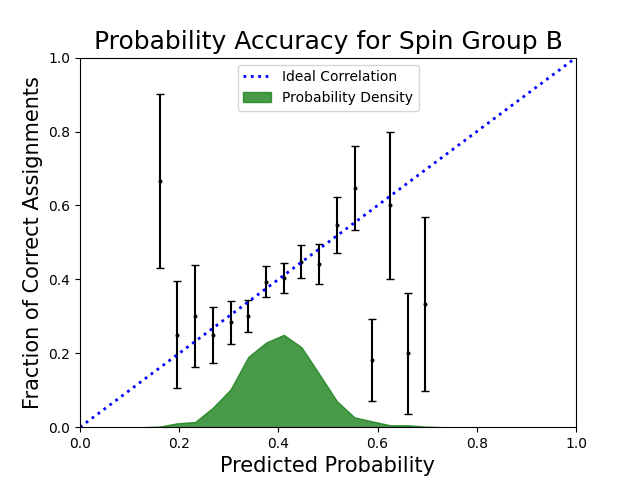

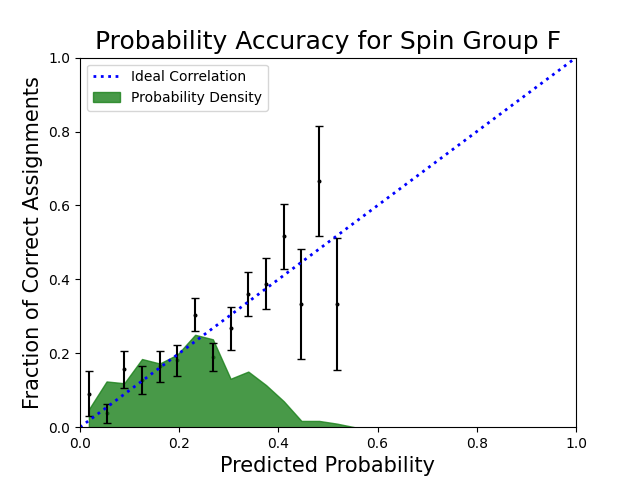

In [13]:
Results.PrintScore(Prior, Types, 'PT-only')
Results.PrintScore(Posterior, Types, 'Wigner+PT')
print()
Results.ConfusionMatrix(Posterior, Types, ['A', 'B', 'F'])
print()
Results.ProbCorrPlot(Posterior, Types, ['A', 'B', 'F'])

In [14]:
print(Posterior)

[[0.40574518 0.43519841 0.15905642]
 [0.43472049 0.34135284 0.22392667]
 [0.32603183 0.43758691 0.23638126]
 ...
 [0.39263392 0.43552467 0.17184141]
 [0.41172816 0.46024808 0.12802376]
 [0.40507667 0.48524988 0.10967344]]


# Basic Spingroup Sampling (WigSample)

...